In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


In [38]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))


In [39]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(train_images, train_images,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(test_images, test_images))


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - loss: 0.3435 - val_loss: 0.1653
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.1561 - val_loss: 0.1371
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1359 - val_loss: 0.1262
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1258 - val_loss: 0.1189
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1188 - val_loss: 0.1137
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.1145 - val_loss: 0.1106
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.1112 - val_loss: 0.1078
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.1087 - val_loss: 0.1054
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.1061 - val_loss: 0.1034
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1036 - val_loss: 0.1014
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.1016 - val_loss: 0.0994
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━

In [40]:
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(test_images)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans_clusters = kmeans.fit_predict(encoded_imgs)

dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_clusters = dbscan.fit_predict(encoded_imgs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


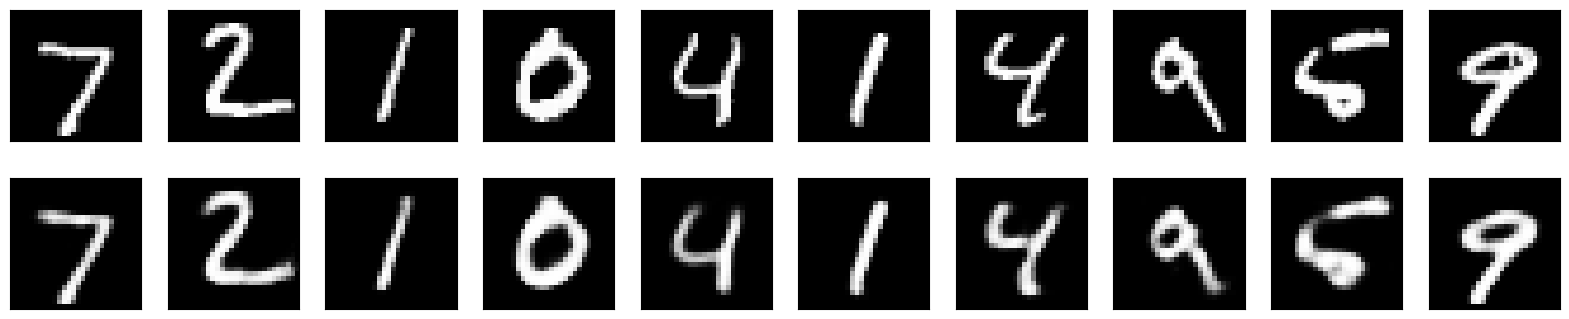

In [41]:
decoded_imgs = autoencoder.predict(test_images)

n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [42]:
print("K-Means clustering performance:")
print(confusion_matrix(test_labels, kmeans_clusters))

print("DBSCAN clustering performance:")
print(confusion_matrix(test_labels, dbscan_clusters))


K-Means clustering performance:
[[671   0   4 191   0   1   5  38   0  70]
 [  0 464   6  20   0   6   4  12 622   1]
 [ 23  31 121 176   2  10 478  17   4 170]
 [ 87   7 431 183  14  29  14  48   3 194]
 [  0   7   3 147 269 391  20 129   7   9]
 [ 35  14 245 292  26  50   5 143   0  82]
 [ 32  28  25 215   0   5 571  18  16  48]
 [  5  22   7  71 184 387   4 332   0  16]
 [ 26  42 332  76  19  46   3 188   4 238]
 [  4   9  10  22 440 312   6 173   4  29]]
DBSCAN clustering performance:
[[   0    0    0    0    0    0    0    0    0    0    0]
 [ 980    0    0    0    0    0    0    0    0    0    0]
 [1135    0    0    0    0    0    0    0    0    0    0]
 [1032    0    0    0    0    0    0    0    0    0    0]
 [1010    0    0    0    0    0    0    0    0    0    0]
 [ 982    0    0    0    0    0    0    0    0    0    0]
 [ 892    0    0    0    0    0    0    0    0    0    0]
 [ 958    0    0    0    0    0    0    0    0    0    0]
 [1028    0    0    0    0    0    0    0 

In [43]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_encoded_imgs = scaler.fit_transform(encoded_imgs)

eps_values = np.linspace(0.1, 1.0, 10)  
min_samples_values = [5, 10, 20, 30, 40] 

best_score = -1
best_params = None
best_clusters = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(scaled_encoded_imgs)
        if len(set(clusters)) > 1:
            score = silhouette_score(scaled_encoded_imgs, clusters)
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)
                best_clusters = clusters
                print(f"New best score: {best_score} with eps={eps} and min_samples={min_samples}")

if best_params is not None:
    print(f"Best DBSCAN parameters: eps={best_params[0]}, min_samples={best_params[1]} with score={best_score}")
else:
    print("No valid clusters found. Try different DBSCAN parameters or check the input data scaling.")


New best score: -0.09953401237726212 with eps=0.9 and min_samples=5
Best DBSCAN parameters: eps=0.9, min_samples=5 with score=-0.09953401237726212


In [44]:
import hdbscan

hdb = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5, cluster_selection_epsilon=0.1)
hdb_clusters = hdb.fit_predict(encoded_imgs)

hdb_score = silhouette_score(encoded_imgs, hdb_clusters)
print(f"HDBSCAN silhouette score: {hdb_score}")


HDBSCAN silhouette score: -0.08252961188554764


C:\Users\HemnSheikh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


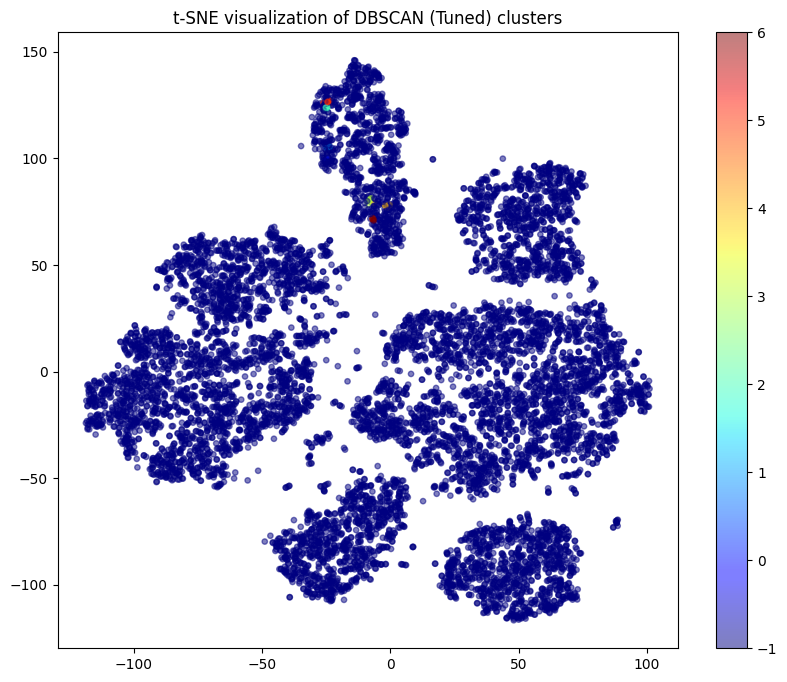

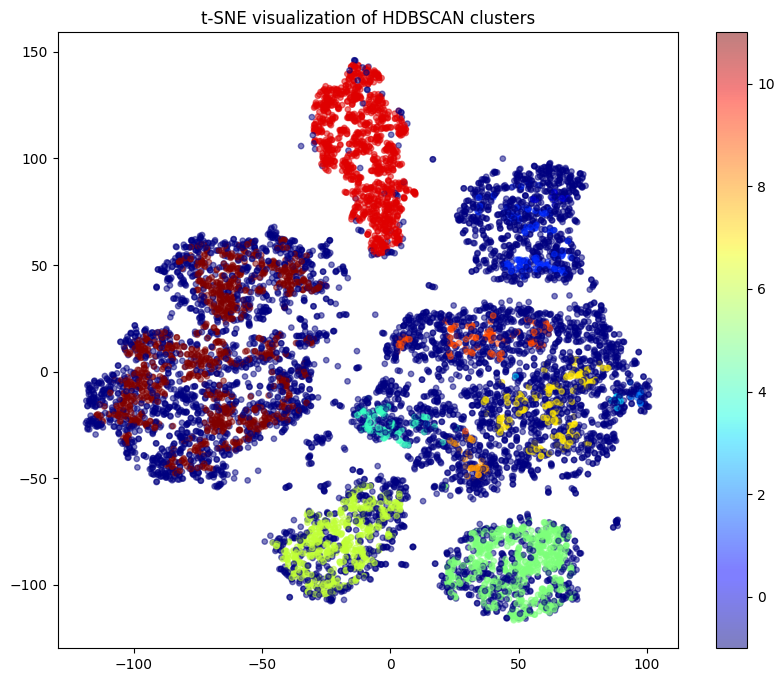

In [45]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, n_iter=3000)
tsne_results = tsne.fit_transform(encoded_imgs)

def plot_clusters(tsne_results, clusters, algorithm_name):
    plt.figure(figsize=(10, 8))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters, cmap='jet', s=15, alpha=0.5)
    plt.colorbar()
    plt.title(f't-SNE visualization of {algorithm_name} clusters')
    plt.show()

plot_clusters(tsne_results, best_clusters, "DBSCAN (Tuned)")
plot_clusters(tsne_results, hdb_clusters, "HDBSCAN")


In [46]:
from sklearn.metrics import silhouette_score

db_silhouette = silhouette_score(encoded_imgs, best_clusters) if best_clusters is not None else None
hdb_silhouette = silhouette_score(encoded_imgs, hdb_clusters)

print(f"DBSCAN Silhouette Score: {db_silhouette}")
print(f"HDBSCAN Silhouette Score: {hdb_silhouette}")


DBSCAN Silhouette Score: -0.1191946417093277
HDBSCAN Silhouette Score: -0.08252961188554764


In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=min(32, encoded_imgs.shape[1]))  
pca_imgs = pca.fit_transform(encoded_imgs)

dbscan_pca = DBSCAN(eps=0.3, min_samples=10)
clusters_pca = dbscan_pca.fit_predict(pca_imgs)
pca_dbscan_silhouette = silhouette_score(pca_imgs, clusters_pca) if len(set(clusters_pca)) > 1 else -1

hdb_pca = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5)
hdb_pca_clusters = hdb_pca.fit_predict(pca_imgs)
pca_hdb_silhouette = silhouette_score(pca_imgs, hdb_pca_clusters) if len(set(hdb_pca_clusters)) > 1 else -1

print(f"DBSCAN with PCA Silhouette Score: {pca_dbscan_silhouette}")
print(f"HDBSCAN with PCA Silhouette Score: {pca_hdb_silhouette}")


DBSCAN with PCA Silhouette Score: -1
HDBSCAN with PCA Silhouette Score: -0.07951468229293823


In [48]:
from sklearn.metrics import adjusted_rand_score

ari_dbscan = adjusted_rand_score(test_labels, clusters_pca)
ari_hdbscan = adjusted_rand_score(test_labels, hdb_pca_clusters)

print(f"Adjusted Rand Index for DBSCAN: {ari_dbscan}")
print(f"Adjusted Rand Index for HDBSCAN: {ari_hdbscan}")


Adjusted Rand Index for DBSCAN: 0.0
Adjusted Rand Index for HDBSCAN: 0.1450977423101546


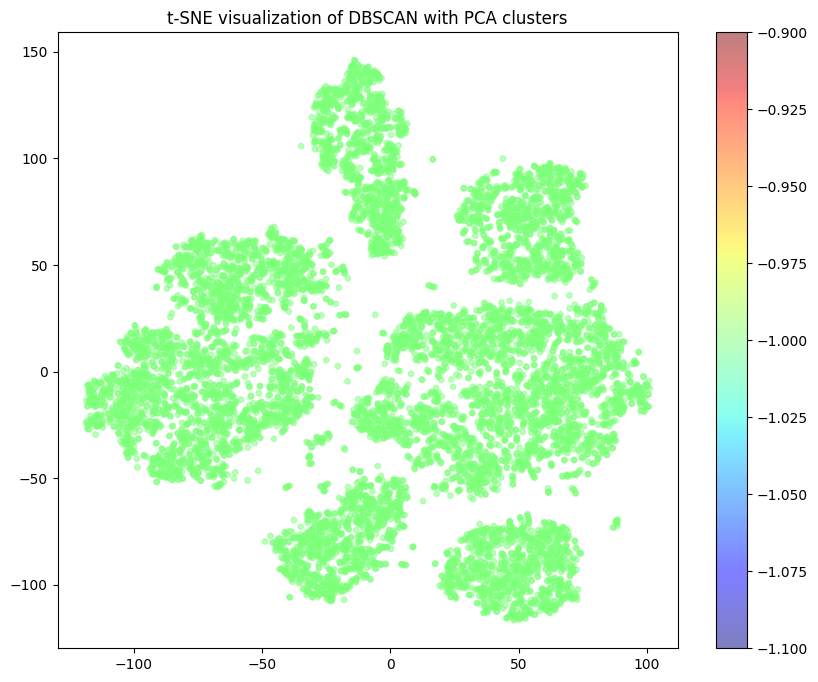

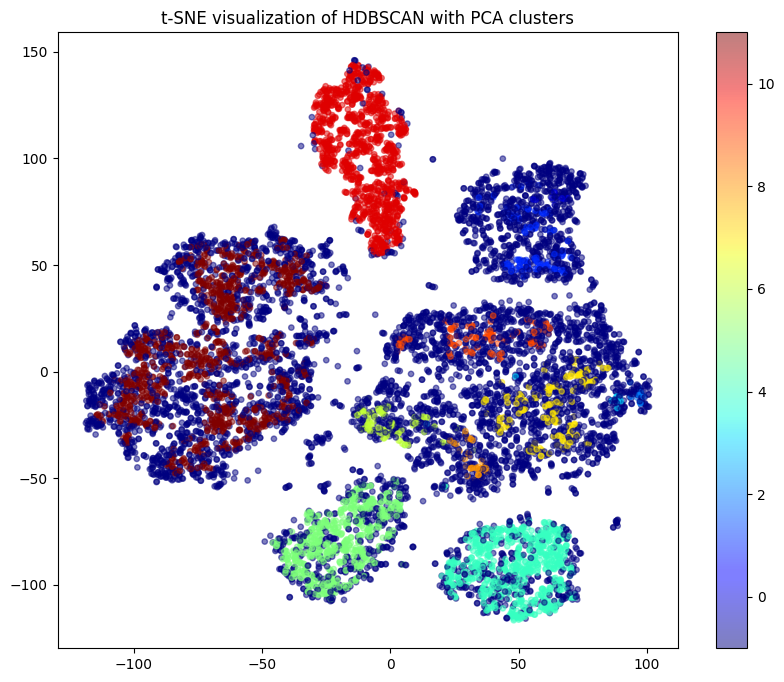

In [49]:
plot_clusters(tsne_results, clusters_pca, "DBSCAN with PCA")
plot_clusters(tsne_results, hdb_pca_clusters, "HDBSCAN with PCA")


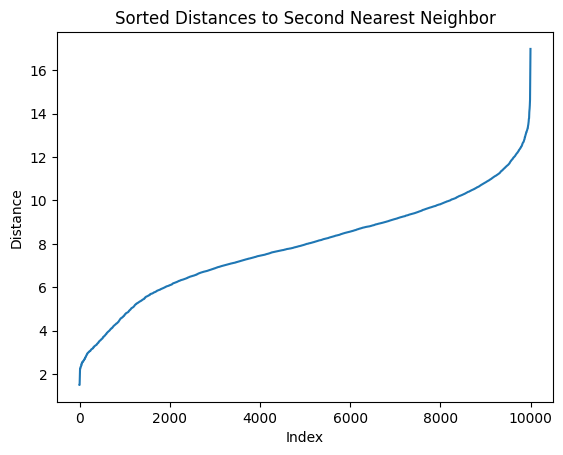

In [50]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

nbrs = NearestNeighbors(n_neighbors=2).fit(pca_imgs)
distances, indices = nbrs.kneighbors(pca_imgs)

sorted_distances = np.sort(distances[:, 1])  
plt.plot(sorted_distances)
plt.title("Sorted Distances to Second Nearest Neighbor")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()


In [51]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=10, random_state=42)
gmm_clusters = gmm.fit_predict(pca_imgs)

gmm_silhouette = silhouette_score(pca_imgs, gmm_clusters)
print(f"GMM Silhouette Score: {gmm_silhouette}")

gmm_ari = adjusted_rand_score(test_labels, gmm_clusters)
print(f"GMM Adjusted Rand Index: {gmm_ari}")


GMM Silhouette Score: 0.06230923905968666
GMM Adjusted Rand Index: 0.5042082189998012


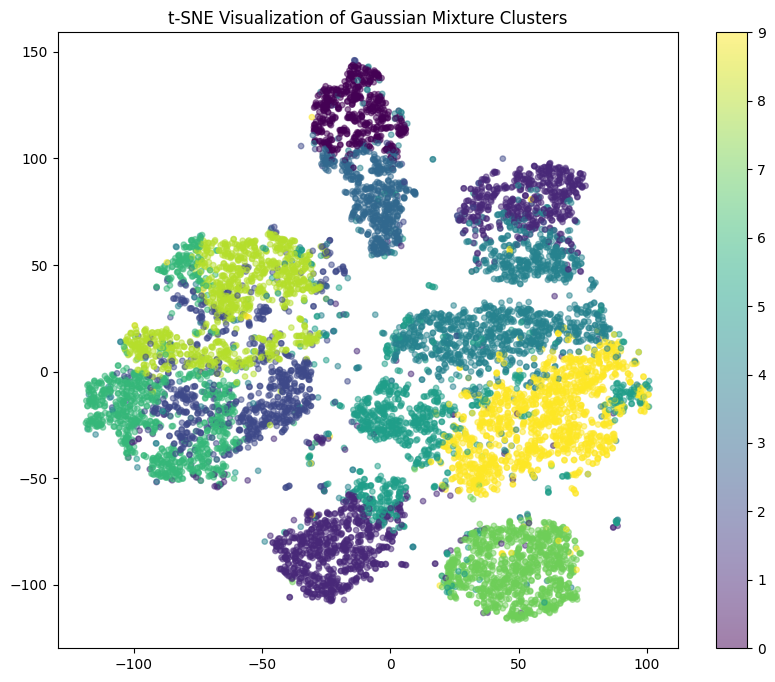

In [52]:
def plot_enhanced_clusters(tsne_results, clusters, algorithm_name):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters, cmap='viridis', s=15, alpha=0.5)
    plt.colorbar(scatter)
    plt.title(f't-SNE Visualization of {algorithm_name} Clusters')
    plt.show()

plot_enhanced_clusters(tsne_results, gmm_clusters, "Gaussian Mixture")


In [53]:
dbscan_refined = DBSCAN(eps=7, min_samples=10)  
clusters_refined = dbscan_refined.fit_predict(pca_imgs)
refined_dbscan_silhouette = silhouette_score(pca_imgs, clusters_refined) if len(set(clusters_refined)) > 1 else -1
refined_dbscan_ari = adjusted_rand_score(test_labels, clusters_refined)

print(f"Refined DBSCAN Silhouette Score: {refined_dbscan_silhouette}")
print(f"Refined DBSCAN Adjusted Rand Index: {refined_dbscan_ari}")


Refined DBSCAN Silhouette Score: -0.1640588343143463
Refined DBSCAN Adjusted Rand Index: 0.044591494120907335


In [54]:
from sklearn.mixture import GaussianMixture

best_gmm_score = 0
best_gmm_ari = 0
best_gmm = None

for n_components in range(5, 15):
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', n_init=5, random_state=42)
    gmm_clusters = gmm.fit_predict(pca_imgs)
    silhouette = silhouette_score(pca_imgs, gmm_clusters)
    ari = adjusted_rand_score(test_labels, gmm_clusters)
    if ari > best_gmm_ari:
        best_gmm_score = silhouette
        best_gmm_ari = ari
        best_gmm = gmm

print(f"Best GMM Silhouette Score: {best_gmm_score}")
print(f"Best GMM Adjusted Rand Index: {best_gmm_ari}")


Best GMM Silhouette Score: 0.06572694331407547
Best GMM Adjusted Rand Index: 0.6097153110370213


In [55]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score

results = []
n_components_range = range(2, 21)  

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
    gmm_clusters = gmm.fit_predict(pca_imgs)
    silhouette = silhouette_score(pca_imgs, gmm_clusters)
    ari = adjusted_rand_score(test_labels, gmm_clusters)
    results.append((n_components, silhouette, ari))

for result in results:
    print(f"Components: {result[0]}, Silhouette Score: {result[1]}, ARI: {result[2]}")


Components: 2, Silhouette Score: 0.07183019071817398, ARI: 0.1605003155228717
Components: 3, Silhouette Score: 0.07508345693349838, ARI: 0.2097991486246177
Components: 4, Silhouette Score: 0.07160429656505585, ARI: 0.36194049976651266
Components: 5, Silhouette Score: 0.07620124518871307, ARI: 0.42011652931731847
Components: 6, Silhouette Score: 0.0696387067437172, ARI: 0.442428747565077
Components: 7, Silhouette Score: 0.07143643498420715, ARI: 0.48962054297295826
Components: 8, Silhouette Score: 0.07137789577245712, ARI: 0.5127109131658687
Components: 9, Silhouette Score: 0.06810396164655685, ARI: 0.5177191997965982
Components: 10, Silhouette Score: 0.06230923905968666, ARI: 0.5042082189998012
Components: 11, Silhouette Score: 0.06926833838224411, ARI: 0.6103058935744913
Components: 12, Silhouette Score: 0.06792694330215454, ARI: 0.5659001006962913
Components: 13, Silhouette Score: 0.07079576700925827, ARI: 0.5495811765413351
Components: 14, Silhouette Score: 0.06480707228183746, ARI:

In [57]:
best_n_components = 15

best_cov_type = None
best_ari = -1
best_silhouette = -1

for cov_type in ['spherical', 'diag', 'tied', 'full']:
    gmm = GaussianMixture(n_components=best_n_components, covariance_type=cov_type, random_state=42)
    gmm_clusters = gmm.fit_predict(pca_imgs)
    silhouette = silhouette_score(pca_imgs, gmm_clusters)
    ari = adjusted_rand_score(test_labels, gmm_clusters)
    if ari > best_ari:
        best_ari = ari
        best_silhouette = silhouette
        best_cov_type = cov_type

print(f"Best Covariance Type: {best_cov_type}, Silhouette Score: {best_silhouette}, ARI: {best_ari}")


Best Covariance Type: full, Silhouette Score: 0.06198499724268913, ARI: 0.6198401499880474


In [58]:
final_gmm = GaussianMixture(n_components=best_n_components, covariance_type=best_cov_type, random_state=42)
final_clusters = final_gmm.fit_predict(pca_imgs)
final_silhouette = silhouette_score(pca_imgs, final_clusters)
final_ari = adjusted_rand_score(test_labels, final_clusters)

print(f"Final GMM Configuration: Components={best_n_components}, Covariance Type={best_cov_type}, Silhouette Score={final_silhouette}, ARI={final_ari}")


Final GMM Configuration: Components=15, Covariance Type=full, Silhouette Score=0.06198499724268913, ARI=0.6198401499880474


C:\Users\HemnSheikh\AppData\Local\Temp\ipykernel_19696\85856109.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=encoded_imgs, multiple="stack")


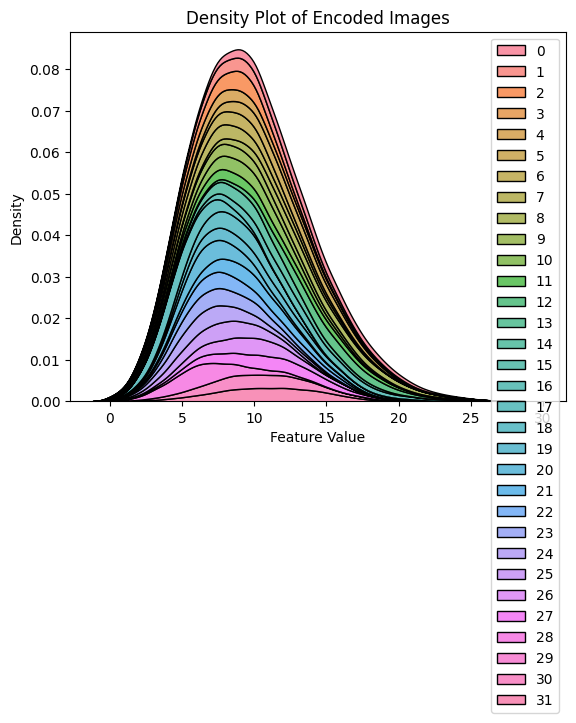

In [60]:
import seaborn as sns

sns.kdeplot(data=encoded_imgs, multiple="stack")
plt.title('Density Plot of Encoded Images')
plt.xlabel('Feature Value')
plt.ylabel('Density')
plt.show()


In [61]:
from sklearn.cluster import SpectralClustering

# Choose an optimal number of clusters, e.g., from your GMM results
spectral = SpectralClustering(n_clusters=15, affinity='nearest_neighbors',
                              assign_labels='kmeans')
labels_spectral = spectral.fit_predict(pca_imgs)

# Evaluate performance
silhouette_spectral = silhouette_score(pca_imgs, labels_spectral)
ari_spectral = adjusted_rand_score(test_labels, labels_spectral)

print(f"Spectral Clustering Silhouette Score: {silhouette_spectral}")
print(f"Spectral Clustering ARI: {ari_spectral}")


Spectral Clustering Silhouette Score: 0.06792433559894562
Spectral Clustering ARI: 0.5764789272169712


In [63]:
from sklearn.semi_supervised import LabelPropagation

label_prop_model = LabelPropagation()
partial_labels = np.full(test_labels.shape, -1)
revealed_indices = np.random.choice(len(test_labels), size=int(len(test_labels) * 0.1), replace=False)
partial_labels[revealed_indices] = test_labels[revealed_indices]

label_prop_model.fit(pca_imgs, partial_labels)
labels_propagated = label_prop_model.transduction_

ari_propagated = adjusted_rand_score(test_labels, labels_propagated)
print(f"Label Propagation ARI: {ari_propagated}")


Label Propagation ARI: 0.0023137466586590043
